## Deep Learning model on stress level dataset

### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from importlib.metadata import version
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
%matplotlib inline
import torch
import torch.nn as nn
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from torch.utils.data import Dataset, DataLoader
from torch.utils.tensorboard import SummaryWriter


print("Using Numpy version:", version("numpy"))
print("Using Pandas version:", version("pandas"))
print("Using Matplotlib version:", version("matplotlib"))
print("Using Scikit-learn version:", version("Scikit-learn"))
print("Using Seaborn version:", version("seaborn"))


2025-09-24 21:11:24.046719: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Using Numpy version: 1.23.5
Using Pandas version: 2.2.3
Using Matplotlib version: 3.10.0
Using Scikit-learn version: 1.6.1
Using Seaborn version: 0.13.2


### Data Exploration

Now, let's analyze the dataset first. We will print the first few rows of the dataset and will look for missing values. We will develop a model to predict the stress level of individuals.

In [2]:
data = pd.read_csv("StressLevelDataset.csv")
data.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [3]:
data.describe(include="all")

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [5]:
data.isnull().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

As described above, the dataset is complete and can be worked on immediately. But before modeling, let's do EDA (Exploratory Data Analysis).

In [6]:
print(f"The column names are {data.columns}")

The column names are Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')


### Data Visualization

now let's look at the different plots of the dataset

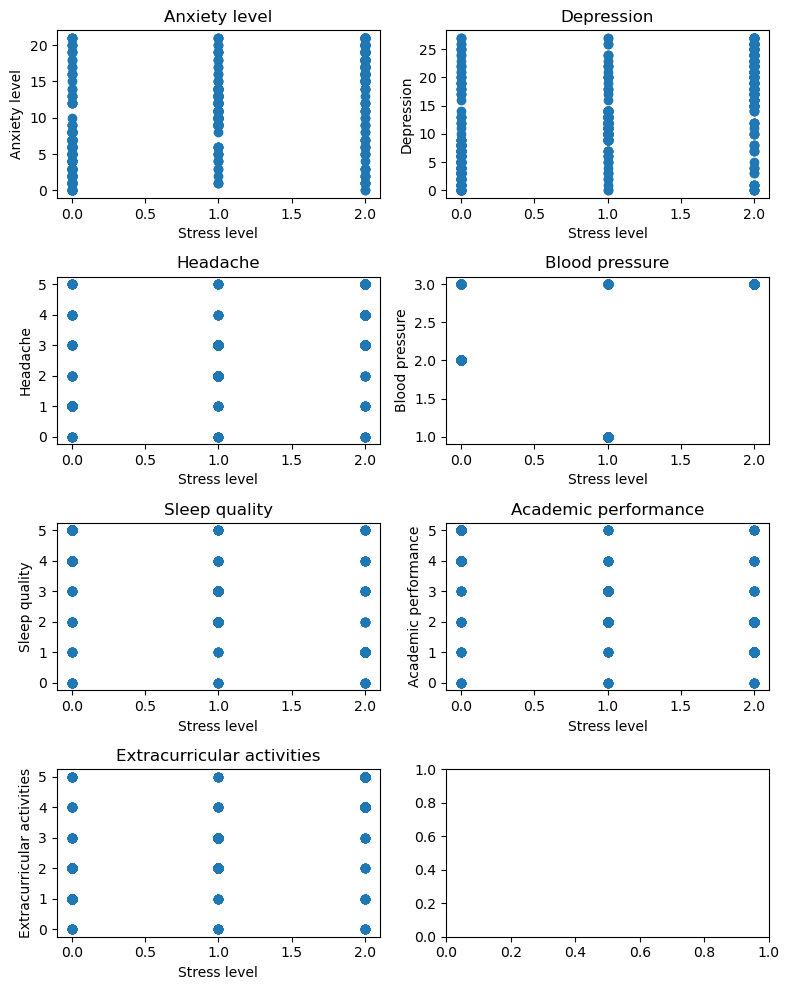

In [7]:
#making subplots of different variables
figure, axis = plt.subplots(4, 2, figsize=(8,10))

#plot for anxiety level vs stress level
axis[0, 0].scatter(data["stress_level"], data["anxiety_level"])
axis[0, 0].set_title("Anxiety level")
axis[0, 0].set_xlabel("Stress level")
axis[0, 0].set_ylabel("Anxiety level")

#plot for depression vs stress level
axis[0,1].scatter(data["stress_level"], data["depression"])
axis[0,1].set_title("Depression")
axis[0, 1].set_xlabel("Stress level")
axis[0, 1].set_ylabel("Depression")

#plot for headache vs stress level
axis[1,0].scatter(data["stress_level"], data["headache"])
axis[1,0].set_title("Headache")
axis[1,0].set_xlabel("Stress level")
axis[1,0].set_ylabel("Headache")


#plot for blood pressure vs stress level
axis[1,1].scatter(data["stress_level"], data["blood_pressure"])
axis[1,1].set_title("Blood pressure")
axis[1,1].set_xlabel("Stress level")
axis[1,1].set_ylabel("Blood pressure")

#plot for sleep quality vs stress level
axis[2,0].scatter(data["stress_level"], data["sleep_quality"])
axis[2,0].set_title("Sleep quality")
axis[2,0].set_xlabel("Stress level")
axis[2,0].set_ylabel("Sleep quality")

#plot for academic performance vs stress level
axis[2,1].scatter(data["stress_level"], data["academic_performance"])
axis[2,1].set_title("Academic performance")
axis[2,1].set_xlabel("Stress level")
axis[2,1].set_ylabel("Academic performance")

#plot for extracurricular activities vs stress level
axis[3,0].scatter(data["stress_level"], data["extracurricular_activities"])
axis[3,0].set_title("Extracurricular activities")
axis[3,0].set_xlabel("Stress level")
axis[3,0].set_ylabel("Extracurricular activities")

plt.tight_layout()
plt.show()

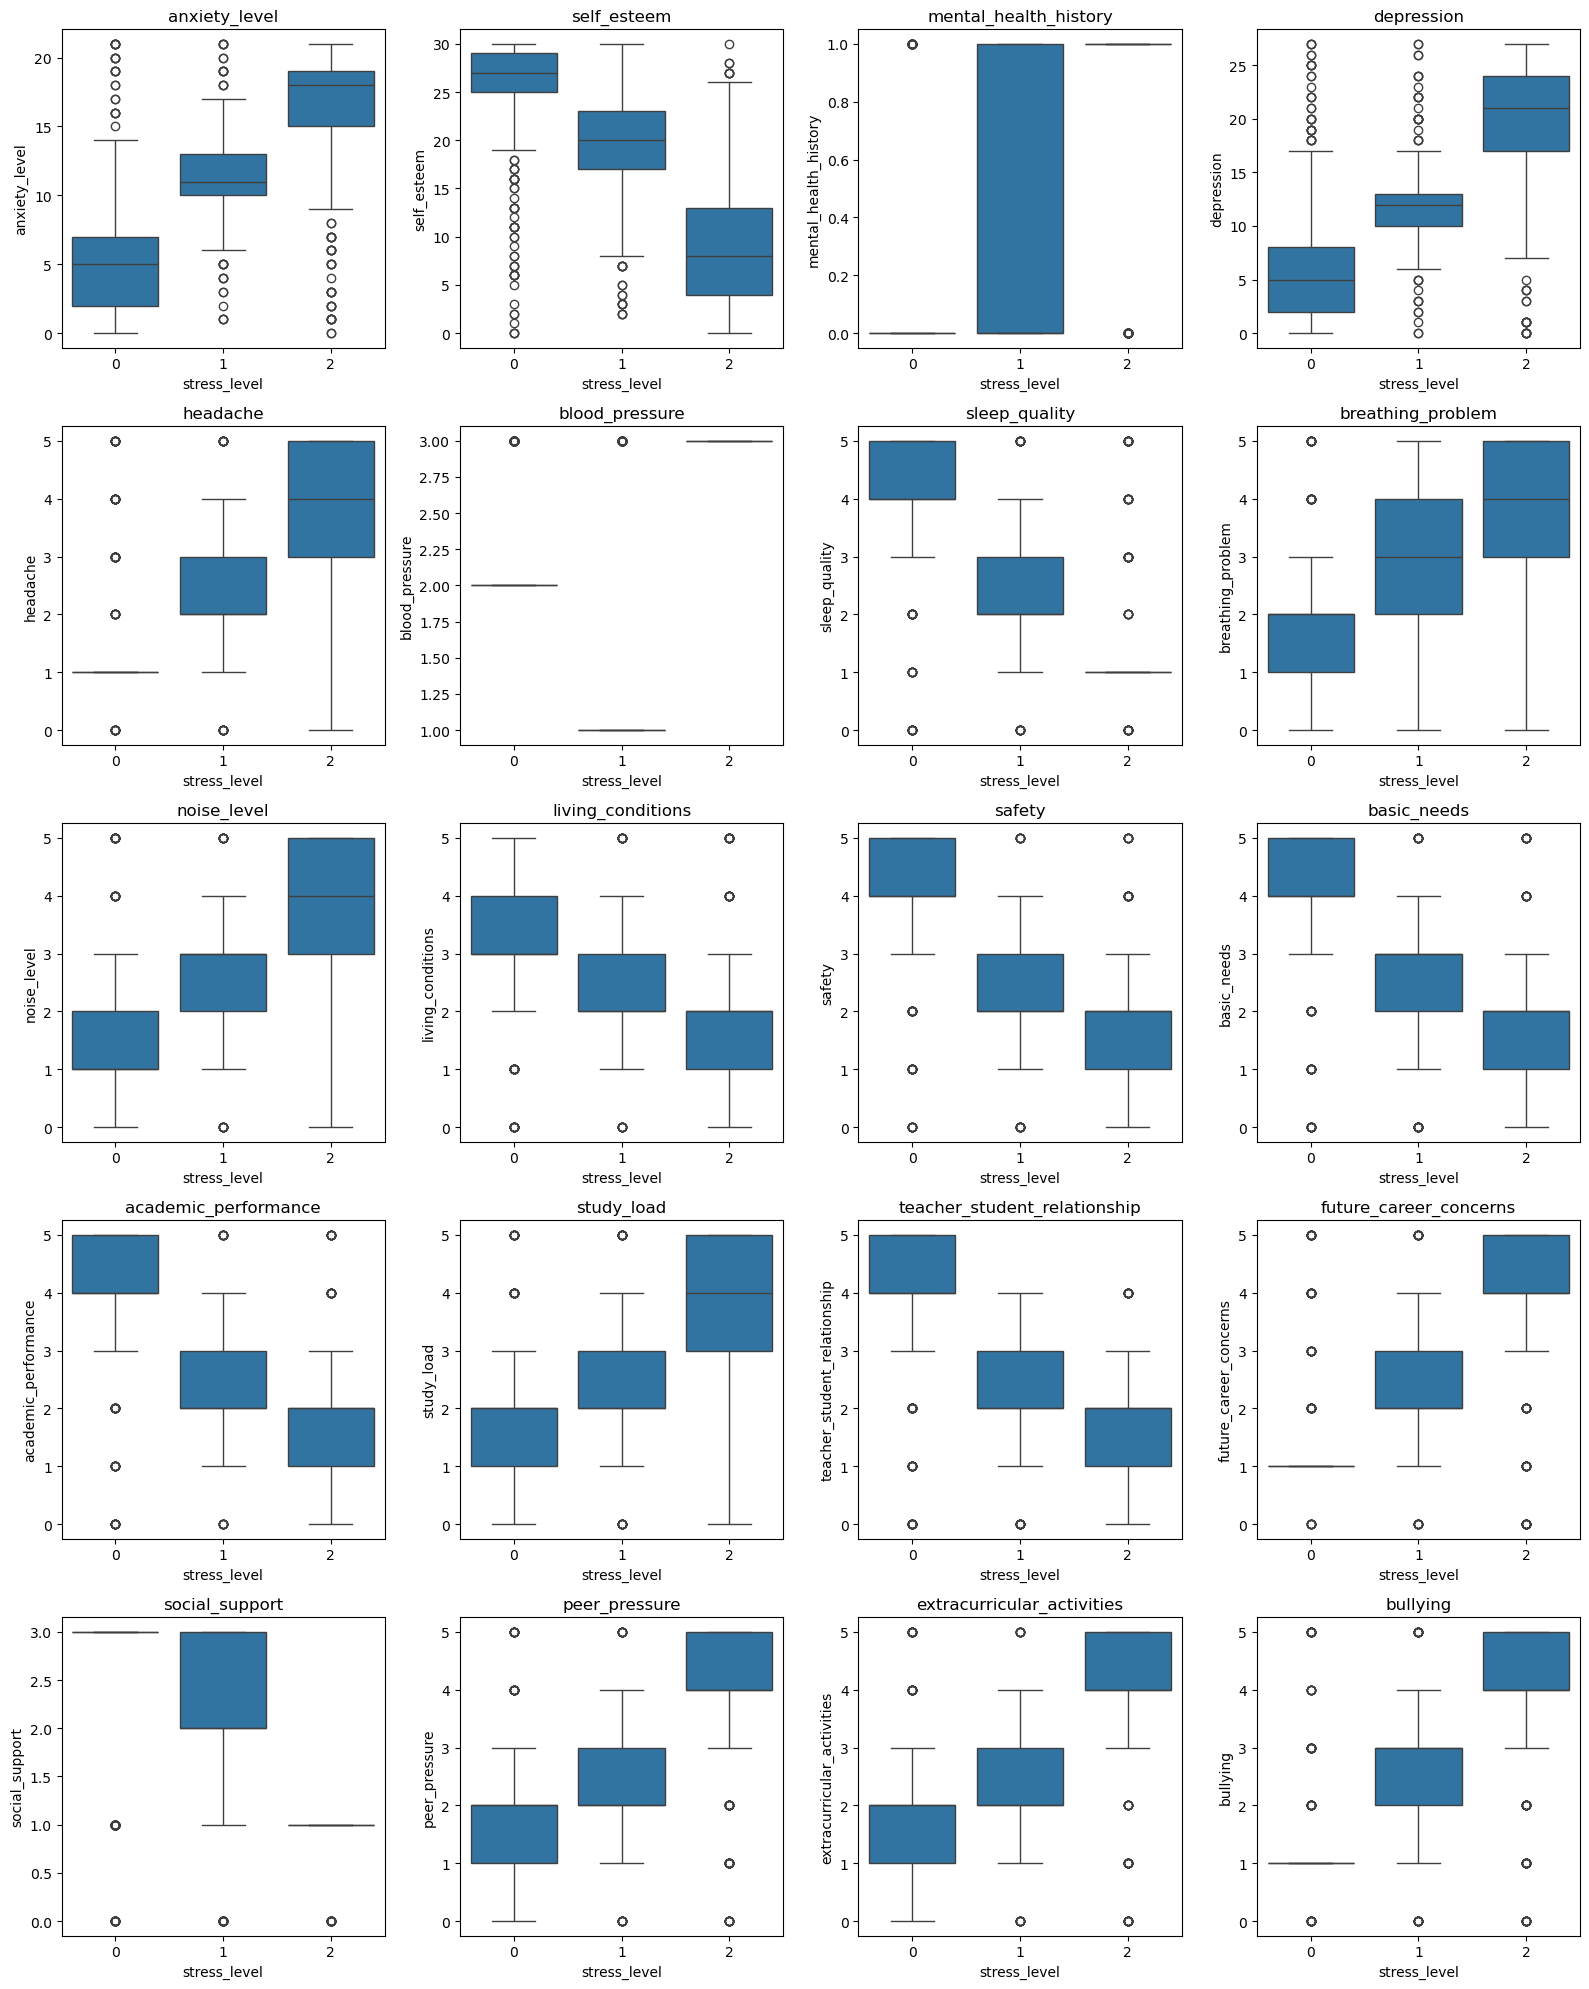

In [8]:
# Your corrected version:
feature_cols = [col for col in data.columns if col != 'stress_level']
n_features = len(feature_cols)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

figure, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
axes = axes.flatten()

for i, feature in enumerate(feature_cols):
    sns.boxplot(data=data, x='stress_level', y=feature, ax=axes[i])
    axes[i].set_title(feature)

# Hides empty subplots if exists
for i in range(n_features, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

So, there are many outliers and we need to remove them before we can train the model. Now, there are many methods to remove outliers. We will use few of those. 

In [9]:
len(data.columns)

21

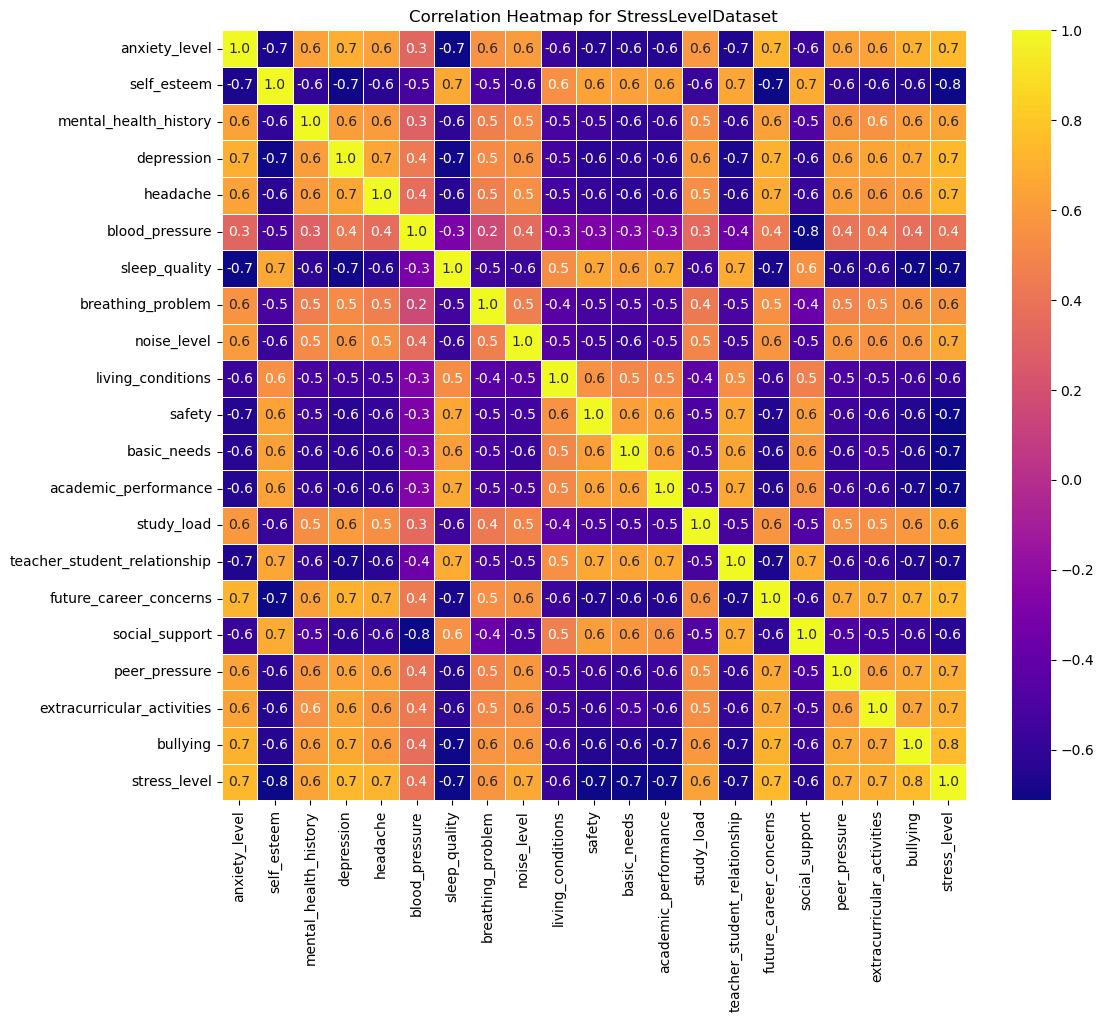

In [10]:
plt.figure(figsize=(12,10))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='plasma', linewidth=.5, fmt=".1f", robust=True)
plt.title('Correlation Heatmap for StressLevelDataset')
plt.show()

### Model Development

Now let's build the model. But before that we have to split the dataset into train and validation set. Ideally there should be one test set also, but test set should be totally different and not a subset of the whole set on which the model is trained on. As we have no other data for model testing, we will stick to only train and validation set. 

In [11]:
### The following line is just for showing you what are the training and target features
'''
training_features = ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying']

target_feature = ["stress_level"]
'''

x_temp = data.drop(["stress_level"], axis=1)
y_temp = data["stress_level"].values

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_temp)

# Splitting before scaling
x_train_temp, x_valid_temp, y_train, y_valid = train_test_split(
    x_temp, y_encoded, random_state=365, shuffle=True, test_size=0.2, stratify=y_encoded
)

# Fitting scaler only on training data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_temp)
x_valid_scaled = scaler.transform(x_valid_temp)  # Only transform validation data

# Converting to tensors
x_train = torch.tensor(x_train_scaled, dtype=torch.float32)
x_valid = torch.tensor(x_valid_scaled, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_valid = torch.tensor(y_valid, dtype=torch.long)

loader = DataLoader(list(zip(x_train, y_train)), shuffle=True, batch_size=64)

print(f"The shape of the training set is {x_train.shape}")
print(f"The shape of the validation set is {x_valid.shape}")
print(f"The shape of the target feature of training set is {y_train.shape}")
print(f"The shape of the target feature of validation set is {y_valid.shape}")

The shape of the training set is torch.Size([880, 20])
The shape of the validation set is torch.Size([220, 20])
The shape of the target feature of training set is torch.Size([880])
The shape of the target feature of validation set is torch.Size([220])


In [12]:
input_size = x_train.shape[1]
num_classes = len(torch.unique(y_train))
class StressLevelClassifier(nn.Module):
    def __init__(self, input_size, num_classes, dropout_rate=0.2):
        super().__init__()
        self.input_size = input_size
        self.num_classes = num_classes
        
        # More gradual size reduction
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, num_classes)
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        
        x = self.fc4(x)
        
        return x
 
model = StressLevelClassifier(input_size, num_classes)
print(model)

StressLevelClassifier(
  (fc1): Linear(in_features=20, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=16, bias=True)
  (fc4): Linear(in_features=16, out_features=3, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
)


In [13]:
loss_fn = nn.CrossEntropyLoss()  # multi class cross entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = lr_scheduler.LinearLR(optimizer, start_factor=1.0, end_factor=0.5, total_iters=500)

## Training

In [ ]:
writer = SummaryWriter()

def train_model(iter):
    
    for epoch in range(iter):
        
        #training loop 
        model.train()
        total_train_loss = 0
        num_batches = 0

        for x_batch, y_batch in loader:
            y_pred = model(x_batch)
            loss = loss_fn(y_pred, y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_train_loss += loss.item()
            num_batches += 1
            
        avg_train_loss = total_train_loss / num_batches
        
        #validation loop
        model.eval()
        with torch.no_grad():
            val_pred = model(x_valid)
            val_loss = loss_fn(val_pred, y_valid)

        writer.add_scalar("Loss/train", loss, epoch)
        writer.add_scalar("Loss/validation", val_loss, epoch)

        before_lr = optimizer.param_groups[0]["lr"]
        scheduler.step()
        after_lr = optimizer.param_groups[0]["lr"]
        print("Epoch %d: lr %.4f -> %.4f Training loss: %.4f Validation loss: %.4f" % (epoch, before_lr, after_lr, loss, val_loss))
        print(f'Finished epoch {epoch}, latest loss {loss}')

train_model(500)
writer.flush()


Epoch 0: lr 0.0010 -> 0.0010 Training loss: 0.9755 Validation loss: 0.9771
Finished epoch 0, latest loss 0.9754913449287415
Epoch 1: lr 0.0010 -> 0.0010 Training loss: 0.8671 Validation loss: 0.7753
Finished epoch 1, latest loss 0.8671474456787109
Epoch 2: lr 0.0010 -> 0.0010 Training loss: 0.5897 Validation loss: 0.5933
Finished epoch 2, latest loss 0.5896590948104858
Epoch 3: lr 0.0010 -> 0.0010 Training loss: 0.6718 Validation loss: 0.5235
Finished epoch 3, latest loss 0.6718195080757141
Epoch 4: lr 0.0010 -> 0.0010 Training loss: 0.4759 Validation loss: 0.4840
Finished epoch 4, latest loss 0.47592592239379883
Epoch 5: lr 0.0010 -> 0.0010 Training loss: 0.5494 Validation loss: 0.4349
Finished epoch 5, latest loss 0.5493696331977844
Epoch 6: lr 0.0010 -> 0.0010 Training loss: 0.4587 Validation loss: 0.3765
Finished epoch 6, latest loss 0.45873185992240906
Epoch 7: lr 0.0010 -> 0.0010 Training loss: 0.3300 Validation loss: 0.3078
Finished epoch 7, latest loss 0.3299836218357086
Epoch 

In [15]:
%load_ext tensorboard
%tensorboard --logdir=runs/ --host localhost --port 8088
%reload_ext tensorboard
## make sure tensorboard is installed and then ensure the logdir name is same as "runs". after running this code go to http://localhost:8088

In [16]:
# evaluate accuracy after training
model.eval()
y_pred = model(x_valid)
acc = (y_pred.round() == y_valid).float().mean()
acc = float(acc)
print("Model accuracy: %.2f%%" % (acc*100))

RuntimeError: The size of tensor a (3) must match the size of tensor b (220) at non-singleton dimension 1

In [ ]:
input_size = x_train.shape[1]
num_classes = len(torch.unique(y_train))
class StressLevelClassifier(nn.Module):
    def __init__(self, input_size, num_classes, dropout_rate=0.2):
        super().__init__()
        self.input_size = input_size
        self.num_classes = num_classes

        self.fc1 = nn.Linear(input_size, 32)
        self.bn1 = nn.BatchNorm1d(32)
        self.dropout1 = nn.Dropout(dropout_rate)
        
        self.fc2 = nn.Linear(32, 16)
        self.bn2 = nn.BatchNorm1d(16)
        self.dropout2 = nn.Dropout(dropout_rate)
        
        self.fc3 = nn.Linear(16, 8)
        self.bn3 = nn.BatchNorm1d(8)
        self.dropout3 = nn.Dropout(dropout_rate)
        
        self.fc4 = nn.Linear(8, num_classes)
        
        self.relu = nn.ReLU()
        
 
    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout1(x)
        
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout2(x)
        
        x = self.fc3(x)
        x = self.bn3(x)
        x = self.relu(x)
        x = self.dropout3(x)
        
        x = self.fc4(x)
        
        return x
 
model = StressLevelClassifier(input_size, num_classes)
print(model)